In [1]:
import pandas as pd

df = pd.read_csv('MD_agric_exam-4313.csv')
df

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava
...,...,...,...,...,...,...,...,...,...,...
995,2202,572.95935,625.6,-5.5,31.0,5.258964,0.086330,1.2,0.750675,wheat
996,2531,552.80945,398.1,-5.9,33.4,4.607136,0.130178,0.8,0.449790,wheat
997,1040,678.22504,564.4,-4.6,31.7,5.567556,0.448149,1.2,0.492988,maize
998,58,792.65370,928.5,-3.3,31.2,5.102048,0.387350,1.1,0.597557,potato


In [ ]:
df['Crop_type'].nunique()

In [8]:
# Find the maximum annual yield for the wheat crop type

max_wheat_yield = df[df['Crop_type'] == 'wheat']['Annual_yield'].max()
max_wheat_yield_rounded = round(max_wheat_yield, 2)
print("The waximum annual yield for wheat crop type is: ", max_wheat_yield_rounded)

The waximum annual yield for wheat crop type is:  8.99


In [11]:
# find the total rainfall for crop types where the average  pollution level is above 0.2

filtered = df.groupby('Crop_type').filter(lambda x: x['Pollution_level'].mean() > 0.2)
total_rainfall = filtered['Rainfall'].sum()
print("The total rainfall for crop types where the average pollution level is above 0.2 is: ", total_rainfall)

The total rainfall for crop types where the average pollution level is above 0.2 is:  941959.7


In [30]:
def cal_temperature_range(df, field_ids):
    temperature_ranges ={}
    for field_id in field_ids:
        temp_df = df[df['Field_ID'] == field_id]
        temp_range = temp_df['Max_temperature_C'].iloc[0] - temp_df['Min_temperature_C'].iloc[0]
        temperature_ranges[field_id] = temp_range
    return temperature_ranges

temp_list = [1458, 1895, 5443]
result = cal_temperature_range(df, temp_list)
for field_id, temp_range in result.items():
    print(f"Temperature range for Field_ID {field_id}: {temp_range}")

Temperature range for Field_ID 1458: 40.7
Temperature range for Field_ID 1895: 35.7
Temperature range for Field_ID 5443: 33.4


In [32]:
a = df['Crop_type'].unique()
b = float('inf')
c = ''

for crop in a:
    d = df[df['Crop_type'] == crop]['Min_temperature_C'].mean()
    if d < b:
        b = d
        c = crop
print(c)

rice


In [36]:
plot = df[df['pH'] < 5.5]['Plot_size'].sum()
rounded = round(plot, 1)
print(f"Total plot size for plots with pH level less than 5.5 is {rounded}")

Total plot size for plots with pH level less than 5.5 is 1731.9


In [39]:
# Filter the dataframe
filtered_df = df[(df['Min_temperature_C'] < -5) & (df['Max_temperature_C'] > 30)]

# Get the number of rows in the filtered dataset
num_rows_filtered = len(filtered_df)

print(f"Number of rows in the filtered dataset is {num_rows_filtered}")

Number of rows in the filtered dataset is 319


In [41]:
import numpy as np
def std_rain():
    mean_plot = df['Plot_size'].median()
    filtered_df = df[df['Plot_size'] > mean_plot]
    std_rainfall = np.std(filtered_df['Rainfall'])
    rounded = round(std_rainfall, 2)
    return rounded

print(f"Standard deviation with plot size larger than the median is {rounded}")

Standard deviation with plot size larger than the median is 469.62


In [53]:

common_temp = df['Max_temperature_C'].mode().iloc[0]
least_crop = df['Crop_type'].value_counts().idxmin()
three_digits = str(common_temp)[:3]
last_three = least_crop[-3:]
final_string = three_digits + last_three
print(f"The concatenated string is {final_string}")

The concatenated string is 30.ice


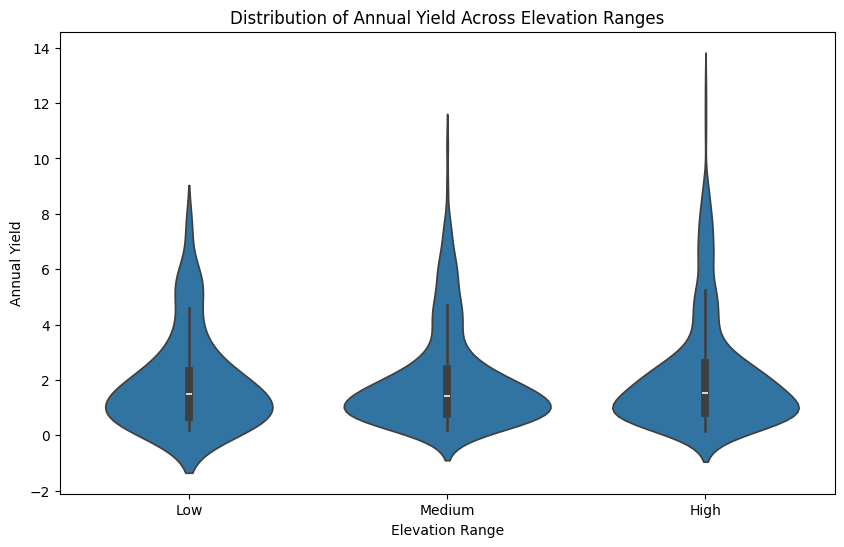

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorize the data based on elevation ranges
df['Elevation_Category'] = pd.cut(df['Elevation'], bins=[-np.inf, 300, 600, np.inf], labels=['Low', 'Medium', 'High'])

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Elevation_Category', y='Annual_yield', data=df)
plt.title('Distribution of Annual Yield Across Elevation Ranges')
plt.xlabel('Elevation Range')
plt.ylabel('Annual Yield')
plt.show()


In [55]:
def sum_crop_type_lengths(df, index=0):
    # Base Case: If the index is equal to the length of unique crop types, return 0
    if index == len(df['Crop_type'].unique()):
        return 0
    
    # Get the current crop type from the unique crop types list using the index
    crop_type = df['Crop_type'].unique()[index]
    
    # Calculate the contribution of the crop type by taking its length
    contribution = len(crop_type)
    
    # Recursively call the function with the next index and add the contribution of the current crop type to the result obtained from the recursive call
    total_sum = contribution + sum_crop_type_lengths(df, index + 1)
    
    return total_sum

# Call the function with the dataset
total_sum = sum_crop_type_lengths(df)
print("Total sum of integer values for each unique crop type:", total_sum)


Total sum of integer values for each unique crop type: 42


In [59]:
from scipy import stats

# Filter the dataset to include only 'coffee' and 'banana' crop types
coffee_data = df[df['Crop_type'] == 'coffee']['Annual_yield']
banana_data = df[df['Crop_type'] == 'banana']['Annual_yield']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(coffee_data, banana_data)

# Print the p-value rounded to three decimal places
print("p-value:", round(p_value, 3))


p-value: 0.598
